In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

C:\Users\e2101316\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\e2101316\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [9]:
# Répertoire cible dans votre projet
import os
project_dir = r"H:\projet_notebook"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:\Users\e2101316\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1"
shutil.copy(cache_file, project_dir)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\e2101316\\.cache\\kagglehub\\datasets\\arnabchaki\\data-science-salaries-2023\\versions\\1'

In [4]:
# Lire le fichier depuis le répertoire du projet
data = pd.read_csv('H:/projet_notebook/ds_salaries.csv', sep=',')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [5]:
#données manquantes 
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


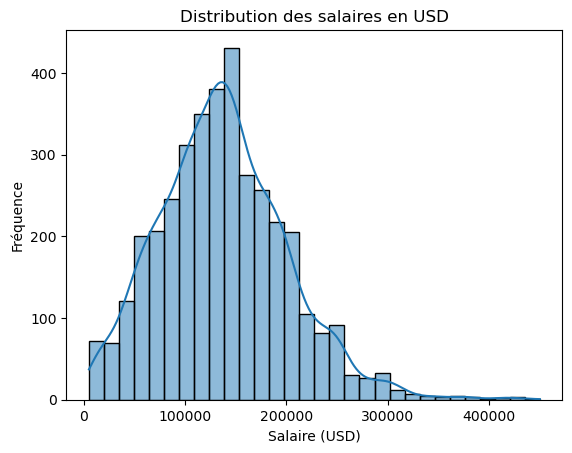

In [6]:
# Distribution des salaires en USD
%matplotlib inline

sns.histplot(data['salary_in_usd'], kde=True, bins=30 )
plt.title('Distribution des salaires en USD')
plt.xlabel('Salaire (USD)')
plt.ylabel('Fréquence')
plt.show()

In [7]:
# liste des pays concerné par l'étude 
groupes_par_pays = data.groupby(['employee_residence'])
pays = groupes_par_pays.groups.keys()
list(pays)

['AE',
 'AM',
 'AR',
 'AS',
 'AT',
 'AU',
 'BA',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CF',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GH',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'KW',
 'LT',
 'LU',
 'LV',
 'MA',
 'MD',
 'MK',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SE',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'US',
 'UZ',
 'VN']

In [8]:
# Salaire moyen par rôle
data['salary_in_usd'].groupby(data['job_title']).mean().round(2)

job_title
3D Computer Vision Researcher     21352.25
AI Developer                     136666.09
AI Programmer                     55000.00
AI Scientist                     110120.88
Analytics Engineer               152368.63
                                   ...    
Research Engineer                163108.38
Research Scientist               161214.20
Software Data Engineer            62510.00
Staff Data Analyst                15000.00
Staff Data Scientist             105000.00
Name: salary_in_usd, Length: 93, dtype: float64

In [9]:
# Salaire moyen par pays
data['salary_in_usd'].groupby(data['employee_residence']).mean().round(2)

employee_residence
AE    100000.00
AM     50000.00
AR     35500.00
AS     32777.50
AT     71125.83
        ...    
TR     19058.00
UA     57850.00
US    152822.01
UZ    103000.00
VN     33466.67
Name: salary_in_usd, Length: 78, dtype: float64

In [10]:
# Salaires moyens par niveau d'expérience
data['salary_in_usd'].groupby(data['experience_level']).mean().round(2)

experience_level
EN     78546.28
EX    194930.93
MI    104525.94
SE    153051.07
Name: salary_in_usd, dtype: float64

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [11]:
# Filtrer les salaires pour un pays donné (ex : US)
data[data.employee_residence == 'US']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [21]:
# Top 5 des entreprises qui paient le plus
data_selec=data[['company_location','salary_in_usd']]
data_entr=data_selec.groupby('company_location').sum()
data_tri=data_entr.sort_values(by='salary_in_usd', ascending=False).head(5)
data_tri



#data_tri=data.sort_values(by='salary_in_usd', ascending=False).groupby('company_location')
#data_tri.sort()

,salary_in_usd
company_location,
US,461538909
GB,14945089
CA,11476839
DE,4944173
ES,4441057


In [28]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
role_selec=data[['job_title','salary_in_usd']]
role_entr=role_selec.groupby('job_title').mean()
role_filtre=role_entr[role_entr.salary_in_usd > 100000]
role_filtre


,salary_in_usd
job_title,
AI Developer,136666.090909
AI Scientist,110120.875000
Analytics Engineer,152368.631068
Applied Data Scientist,113726.300000
Applied Machine Learning Scientist,109452.833333
Applied Scientist,190264.482759
BI Analyst,104888.888889
BI Developer,129846.153846
Big Data Architect,125802.500000


In [32]:
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
pays_selec=data[['company_location','remote_ratio']]
pays_entr=pays_selec.groupby('company_location').max()
pays_filtre=pays_entr[pays_entr.remote_ratio == 100]
pays_filtre

,remote_ratio
company_location,
AE,100
AR,100
AS,100
AU,100
BE,100
BR,100
CA,100
CF,100
CH,100


In [34]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
#selec=data[['salary_in_usd','remote_ratio']]
#dist=data[data.remote_ratio == 100]
#moy_sal=dist.groupby('salary_in_usd').mean()
#moy_sal

# Comparer salaires moyens pour deux catégories



TypeError: agg function failed [how->mean,dtype->object]

In [16]:
# Ajouter une colonne pour les fourchettes de salaires



Données avec fourchettes de salaires :    salary_in_usd salary_range
0          85847     50k-100k
1          30000         <50k
2          25500         <50k
3         175000        150k+
4         120000    100k-150k
Pays avec les salaires moyens les plus élevés : employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
Name: salary_in_usd, dtype: float64


In [ ]:
# Analyse des corrélations
# Relation entre télétravail et salaire


In [ ]:
# Salaire moyen par taille d'entreprise


In [ ]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = data.pivot_table(
    index='', 
    columns='', 
    values='', 
    aggfunc=''
)
print("Tableau croisé des salaires :", pivot_table)